<a href="https://colab.research.google.com/github/CodeHunterOfficial/Python_Basics/blob/main/Lecture_6_2_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQLite
## Подключение к SQLite

Python по умолчанию поддерживает работу с базой данных SQLite. Для этого применяется встроенная библиотека sqlite3, которая в python доступна в виде одноименного модуля.

Для подключения к бд в этой библиотеке определена функция connect():



```
sqlite3.connect(database, timeout=5.0, detect_types=0, isolation_level='DEFERRED', check_same_thread=True, factory=sqlite3.Connection, cached_statements=128, uri=False)

```



Она принимает следующие параметры:

* database: путь к файлу базы данных. Если база данных расположена в памяти, а не на диске, то для открытия подключения используется ":memory:"

* timeout: период времени в секундах, через который генерируется исключение, если файл бд занят другим процессом

* detect_types: управляет сопоставлением типов SQLite с типами Python. Значение 0 отключает сопоставление

* isolation_level : устанавливает уровень изоляции подключения и определяет процесс отрытия неявных транзакций. Возможные значения: "DEFERRED" (значение по умолчанию), "EXCLUSIVE", "IMMEDIATE" или None (неявные транзакции отключены)

* check_same_thread: если равно True (значение по умолчанию), то только поток, который создал подключение, может его использовать. Если равно False, подключение может использоваться несколькими потоками.

* factory: класс фабрики, который применяется для создания подключения. Должен представлять класс, производный от Connection. По умолчанию используется класс sqlite3.Connection

* cached_statements: количество SQL-инструкций, которые должны кэшироваться. По умолчанию равно 128.

* uri: булевое значение, если равно True, то путь к базе данных рассматривается как адрес URI

Обязательным параметром функции является путь к базе данных. Результатом функции является объект подключения (объект класса Connection), через затем можно взаимодействовать с базой данных.

Например, подключение к базе данных "myfirst.db", которая располагается в той же папке, что и текущий скрипт (если такая база данных отсутствует, то она автоматически создается):

In [2]:
import sqlite3;

con = sqlite3.connect("myfirst.db")

## Сопоставление типов SQLite и Python
Прежде чем начать работать с базой данных, следует понимать, как сопоставляются типы SQLite и типы Python. По умолчанию применяются следующие сопоставления:

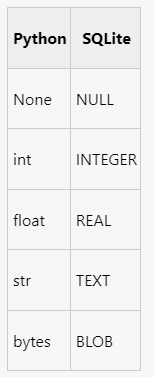

Следует отметить, что при необходимости мы можем переопределять сопоставление, применяя кастомные конвертеры типов.

## Получение курсора
Для выполнения выражений SQL и получения данных из БД, необходимо создать курсор. Для этого у объекта Connection вызывается метод cursor(). Этот метод возвращает объект Cursor:

In [3]:
import sqlite3;
# создаем подключение
con = sqlite3.connect("firstDB.db")
# получаем курсор
cursor = con.cursor()

## Выполнение запросов к базе данных
Для выполнения запросов и получения данных класс Cursor предоставляет ряд методов:

* execute(sql, parameters=(), /): выполняет одну SQL-инструкцию. Через второй параметр в код SQL можно передать набор параметров в виде списка или словаря

* executemany(sql, parameters, /): выполняет параметризованное SQL-инструкцию. Через второй параметр принимает наборы значений, которые передаются в выполняемый код SQL.

* executescript(sql_script, /): выполняет SQL-скрипт, который может включать множество SQL-инструкций

* fetchone(): возвращает одну строку в виде кортежа из полученного из БД набора строк

* fetchmany(size=cursor.arraysize): возвращает набор строк в виде списка. количество возвращаемых строк передается через параметр. Если больше строк нет в наборе, то возвращается пустой список.

* fetchall(): возвращает все (оставшиеся) строки в виде списка. При отсутствии строк возвращается пустой список.

## Создание таблицы
Для создания таблицы в SQLite применяется инструкция CREATE TABLE. Например, создадим в базе данных "metanit.db" таблицу people:

In [4]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

# создаем таблицу people
cursor.execute("""CREATE TABLE people
                (id INTEGER PRIMARY KEY AUTOINCREMENT,
                name TEXT,
                age INTEGER)
            """)

В метод cursor.execute() передается инструкция CREATE TABLE, которая создает таблицу people с тремя столбцами. Столбец id представляет идентификатор пользователя, хранит данные типа Integer, то есть число, и также представляет первичный ключ, значение которого будет автоматически генерироваться и инкрементироваться с каждой новой строкой. Второй столбец - name представляет строку - имя пользователя. И третий столбец - age представляет возраст пользователя.

После выполнения скрипта мы можем открыть базу данных в каком-нибудь браузере баз данных SQLite, например, в DB Browser for SQLite и увидеть созданную таблицу

## Основные операции с данными в SQLite

Рассмотрим основные операции с базой данных SQLite с помощью библиотеки sqlite3 на примере таблицы:



```
CREATE TABLE people (
    id INTEGER PRIMARY KEY AUTOINCREMENT,  
    name TEXT,
    age INTEGER
)
```



## Добавление данных
Для добавления данных применяется SQL-инструкция INSERT. Для добавления одной строки используем метод execute() объекта Cursor:

In [6]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

# Создание таблицы
# Создание таблицы "people"
cursor.execute('''CREATE TABLE IF NOT EXISTS people (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    name TEXT,
                    age INTEGER
                )''')

# добавляем строку в таблицу people
cursor.execute("INSERT INTO people (name, age) VALUES ('Tom', 38)")
# выполняем транзакцию
con.commit()

## Множественная вставка
Метод executemany() позволяет вставить набор строк:

In [7]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

# данные для добавления
people = [("Sam", 28), ("Alice", 33), ("Kate", 25)]
cursor.executemany("INSERT INTO people (name, age) VALUES (?, ?)", people)

con.commit()

В метод cursor.executemany() по сути передается то же самое выражение SQL, только теперь данные определены в виде списка кортежей people. Фактически каждый кортеж в этом списке представляет отдельную строку - данные отдельного пользователя, и при выполнении метода для каждого кортежа будет создаваться свое выражение INSERT INTO

## Получение данных
Для получения данных применяется SQL-команда SELECT. После выполнения этой команды курсор получает данные, которые можно получить с помощью одного из методов: fetchall() (возвращает список со всеми строками), fetchmany() (возвращает указанное количество строк) и fetchone() (возвращает одну в наборе строку).

### Получение всех строк
Например, получим все ранее добавленные данные из таблицы people:

In [8]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

# получаем все данные из таблицы people
cursor.execute("SELECT * FROM people")
print(cursor.fetchall())

[(1, 'Tom', 38), (2, 'Sam', 28), (3, 'Alice', 33), (4, 'Kate', 25)]


При необходимости мы можем перебрать список, используя стандартные циклические конструкции:

In [10]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

cursor.execute("SELECT * FROM people")
for person in cursor.fetchall():
    print(f"{person[1]} - {person[2]}")

Tom - 38
Sam - 28
Alice - 33
Kate - 25


### Получение части строк
Получение части строк с помощью метода fetchmany(), в который передается количество строк:

In [11]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

cursor.execute("SELECT * FROM people")
# извлекаем первые 3 строки в полученном наборе
print(cursor.fetchmany(3))

[(1, 'Tom', 38), (2, 'Sam', 28), (3, 'Alice', 33)]


### Получение одной строки
Метод fetchone() извлекает следующую строку в виде кортежа значений и возвращает его. Если строк больше нет, то возвращает None:



In [12]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

cursor.execute("SELECT * FROM people")
# извлекаем одну строку
print(cursor.fetchone())    # (1, 'Tom', 38)

(1, 'Tom', 38)


Данный метод удобно применять, когда нам надо извлечь из базы данных только один объект:

In [13]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

cursor.execute("SELECT name, age FROM people WHERE id=2")
# раскладываем кортеж на две переменных
name, age = cursor.fetchone()
print(f"Name: {name}    Age: {age}")    # Name: Bob   Age: 42

Name: Sam    Age: 28


Здесь получаем из бд строку с id=2, и полученный результат раскладываем на две переменных name и age (так как кортеж в Python можно разложить на отдельные значения)

## Обновление
Для обновления в SQL выполняется команда UPDATE. Например, заменим у всех пользователей имя с Tom на Tomas:

In [14]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

# обновляем строки, где name = Tom
cursor.execute("UPDATE people SET name ='Tomas' WHERE name='Tom'")
# вариант с подстановками
# cursor.execute("UPDATE people SET name =? WHERE name=?", ("Tomas", "Tom"))
con.commit()

# проверяем
cursor.execute("SELECT * FROM people")
print(cursor.fetchall())    # [(1, 'Tomas', 38), (2, 'Bob', 42), (3, 'Sam', 28), (4, 'Alice', 33), (5, 'Kate', 25)]

[(1, 'Tomas', 38), (2, 'Sam', 28), (3, 'Alice', 33), (4, 'Kate', 25)]


Для выполнения обновления также надо выполнять метод con.commit()

## Удаление данных
Для удаления в SQL выполняется команда DЕLETE. Например, удалим всех пользователей с именем Bob:

In [15]:
import sqlite3;

con = sqlite3.connect("firstDB.db")
cursor = con.cursor()

# обновляем строки, где name = Tom
cursor.execute("DELETE FROM people WHERE name=?", ("Bob",))
con.commit()

# проверяем
cursor.execute("SELECT * FROM people")
print(cursor.fetchall())    # [(1, 'Tomas', 38), (3, 'Sam', 28), (4, 'Alice', 33), (5, 'Kate', 25)]


[(1, 'Tomas', 38), (2, 'Sam', 28), (3, 'Alice', 33), (4, 'Kate', 25)]


Для выполнения удаления также надо выполнять метод con.commit()

Допустим, у нас есть две таблицы: "users" и "orders". Мы можем использовать операторы SQL для выполнения запросов, объединяющих данные из обеих таблиц. Ниже приведен пример работы с двумя таблицами:

In [16]:
import sqlite3

# Создание подключения к базе данных
conn = sqlite3.connect('example.db')

# Создание курсора для выполнения запросов
cursor = conn.cursor()

# Создание таблицы "users"
cursor.execute('''CREATE TABLE IF NOT EXISTS users (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    name TEXT,
                    email TEXT
                )''')

# Создание таблицы "orders"
cursor.execute('''CREATE TABLE IF NOT EXISTS orders (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    user_id INTEGER,
                    product TEXT,
                    FOREIGN KEY (user_id) REFERENCES users(id)
                )''')

# Вставка данных в таблицу "users"
cursor.execute("INSERT INTO users (name, email) VALUES ('Alice', 'alice@example.com')")
cursor.execute("INSERT INTO users (name, email) VALUES ('Bob', 'bob@example.com')")

# Вставка данных в таблицу "orders"
cursor.execute("INSERT INTO orders (user_id, product) VALUES (1, 'Product A')")
cursor.execute("INSERT INTO orders (user_id, product) VALUES (2, 'Product B')")

# Выполнение запроса для объединения данных из обеих таблиц
cursor.execute("SELECT users.name, orders.product FROM users INNER JOIN orders ON users.id = orders.user_id")

# Получение результатов
results = cursor.fetchall()
print(results)

# Закрытие подключения
conn.close()


[('Alice', 'Product A'), ('Bob', 'Product B')]


Пример 1: Обновление данных в одной таблице на основе данных из другой таблицы:

In [17]:
import sqlite3

# Создание подключения к базе данных
conn = sqlite3.connect('example.db')

# Создание курсора для выполнения запросов
cursor = conn.cursor()

# Обновление данных в одной таблице на основе данных из другой таблицы
cursor.execute("UPDATE users SET email = (SELECT email FROM orders WHERE orders.user_id = users.id) WHERE id = 1")

# Сохранение изменений
conn.commit()

# Закрытие подключения
conn.close()


**Пример 2:** Удаление данных из одной таблицы на основе условия из другой таблицы:

In [18]:
import sqlite3

# Создание подключения к базе данных
conn = sqlite3.connect('example.db')

# Создание курсора для выполнения запросов
cursor = conn.cursor()

# Удаление данных из одной таблицы на основе условия из другой таблицы
cursor.execute("DELETE FROM users WHERE id IN (SELECT user_id FROM orders WHERE product = 'Product B')")

# Сохранение изменений
conn.commit()

# Закрытие подключения
conn.close()

В базе данных SQLite вы можете тоже использовать оператор SQL GROUP BY для группировки данных по определенному столбцу или столбцам. Это позволяет вам выполнять агрегатные функции, такие как COUNT, SUM, AVG и другие, для каждой группы значений.

Вот пример использования оператора GROUP BY:

In [21]:
import sqlite3

# Создание подключения к базе данных
conn = sqlite3.connect('example.db')

# Создание курсора для выполнения запросов
cursor = conn.cursor()

# Создание таблицы "employees"
cursor.execute('''CREATE TABLE IF NOT EXISTS employees (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    name TEXT,
                    department TEXT,
                    salary INTEGER
                )''')

# Вставка данных в таблицу "employees"
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Alice', 'HR', 50000)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Bob', 'Sales', 60000)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Charlie', 'HR', 55000)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('David', 'IT', 65000)")

# Выполнение запроса и группировка данных по столбцу "department"
cursor.execute("SELECT department, COUNT(*), AVG(salary) FROM employees GROUP BY department")

# Получение результатов
results = cursor.fetchall()
for row in results:
    print(row)

# Закрытие подключения
conn.close()

('HR', 2, 52500.0)
('IT', 1, 65000.0)
('Sales', 1, 60000.0)


Для преобразования данных из базы данных SQLite в формат JSON вам потребуется использовать язык программирования, который поддерживает работу с базами данных SQLite и имеет встроенные или сторонние библиотеки для работы с JSON.

Вот пример использования Python для выполнения этой задачи:

In [25]:
import sqlite3
import json

# Создание подключения к базе данных
conn = sqlite3.connect('example.db')

# Создание курсора для выполнения запросов
cursor = conn.cursor()

# Создание таблицы "employees"
cursor.execute('''CREATE TABLE IF NOT EXISTS employees (
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    name TEXT,
                    department TEXT,
                    salary INTEGER
                )''')

# Вставка данных в таблицу "employees"
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Alice', 'HR', 50000)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Bob', 'Sales', 60000)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('Charlie', 'HR', 55000)")
cursor.execute("INSERT INTO employees (name, department, salary) VALUES ('David', 'IT', 65000)")

# Выполнение запроса для выборки данных из таблицы и преобразование в JSON
cursor.execute("SELECT * FROM employees")
rows = cursor.fetchall()
print(rows)
# Преобразование данных в формат JSON
result = []
for row in rows:
    result.append({
        "id": row[0],
        "name": row[1],
        "department": row[2],
        "salary": row[3]
    })

json_data = json.dumps(result, indent=4)
print(json_data)

# Закрытие подключения
conn.close()

[(1, 'Alice', 'HR', 50000), (2, 'Bob', 'Sales', 60000), (3, 'Charlie', 'HR', 55000), (4, 'David', 'IT', 65000)]
[
    {
        "id": 1,
        "name": "Alice",
        "department": "HR",
        "salary": 50000
    },
    {
        "id": 2,
        "name": "Bob",
        "department": "Sales",
        "salary": 60000
    },
    {
        "id": 3,
        "name": "Charlie",
        "department": "HR",
        "salary": 55000
    },
    {
        "id": 4,
        "name": "David",
        "department": "IT",
        "salary": 65000
    }
]


В этом примере мы выбираем данные из таблицы "employees" в базе данных SQLite, преобразуем результаты запроса в формат JSON с помощью библиотеки json, и затем выводим полученный JSON.


Для преобразования данных из формата JSON в базу данных SQLite вы можете использовать язык программирования, такой как Python. Вот пример того, как это можно сделать:

In [26]:
import sqlite3
import json

# JSON данные
json_data = '''
[
    {
        "id": 1,
        "name": "Alice",
        "department": "HR",
        "salary": 50000
    },
    {
        "id": 2,
        "name": "Bob",
        "department": "Sales",
        "salary": 60000
    },
    {
        "id": 3,
        "name": "Charlie",
        "department": "HR",
        "salary": 55000
    }
]
'''

# Преобразование JSON данных в словарь Python
data = json.loads(json_data)

# Создание новой базы данных SQLite
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Создание таблицы для хранения JSON данных
cursor.execute('''CREATE TABLE IF NOT EXISTS employees (
                    id INTEGER PRIMARY KEY,
                    name TEXT,
                    department TEXT,
                    salary INTEGER
                )''')

# Вставка JSON данных в базу данных SQLite
for row in data:
    cursor.execute("INSERT INTO employees (id, name, department, salary) VALUES (?, ?, ?, ?)", (row['id'], row['name'], row['department'], row['salary']))

# Применение изменений и закрытие подключения
conn.commit()
conn.close()


Для преобразования данных из базы данных SQLite в формат XML и из формата XML в базу данных SQLite, вы можете использовать язык программирования, такой как Python, совместно с соответствующими библиотеками для работы с SQLite и XML.

Вот пример того, как можно преобразовать данные из базы данных SQLite в формат XML и наоборот, используя Python:

## Преобразование данных из SQLite в XML:

In [27]:
import sqlite3
import xml.etree.ElementTree as ET

# Создание подключения к базе данных SQLite
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Выборка данных из таблицы и преобразование в XML
cursor.execute("SELECT * FROM employees")
rows = cursor.fetchall()

# Создание корневого элемента XML
root = ET.Element("employees")

# Добавление данных в XML
for row in rows:
    employee = ET.SubElement(root, "employee")
    id = ET.SubElement(employee, "id")
    id.text = str(row[0])
    name = ET.SubElement(employee, "name")
    name.text = row[1]
    department = ET.SubElement(employee, "department")
    department.text = row[2]
    salary = ET.SubElement(employee, "salary")
    salary.text = str(row[3])

# Создание объекта ElementTree и запись в файл
tree = ET.ElementTree(root)
tree.write("employees.xml")

# Закрытие подключения
conn.close()

## Преобразование данных из XML в SQLite:

In [29]:
import sqlite3
import xml.etree.ElementTree as ET

# Чтение данных из XML файла
tree = ET.parse('employees.xml')
root = tree.getroot()

# Создание подключения к базе данных SQLite
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Создание таблицы для хранения данных
cursor.execute('''CREATE TABLE IF NOT EXISTS employees (
                    id INTEGER PRIMARY KEY,
                    name TEXT,
                    department TEXT,
                    salary INTEGER
                )''')

# Вставка данных из XML в базу данных SQLite
for employee in root.findall('employee'):
    id = int(employee.find('id').text)
    name = employee.find('name').text
    department = employee.find('department').text
    salary = int(employee.find('salary').text)

    # Проверка наличия записи с таким же id перед вставкой
    cursor.execute("SELECT * FROM employees WHERE id=?", (id,))
    existing_record = cursor.fetchone()

    if existing_record is None:
        cursor.execute("INSERT INTO employees (id, name, department, salary) VALUES (?, ?, ?, ?)", (id, name, department, salary))

# Применение изменений и закрытие подключения
conn.commit()
conn.close()